# 信大CRESTのアーカイブデータをリモートで読み取ってpython DataFrameに格納するモジュールCRESTのデモ

### CREST.pyをインポート

In [1]:
import CREST

観測所名リスト

In [4]:
CREST.stations.keys()

dict_keys(['Nagoya', 'Hobart', 'SaoMartinho', 'Kuwait', 'Syowa'])

リモートで読み取る関数のヘルプ

In [5]:
help(CREST.load)

Help on function load in module CREST:

load(station, year, corrected=False)
    Read archive data from Shinshu Univ. CREST website.
    
    Parameters
    ----------
    station: str
        Station name.
    year: int
        Year of archive data file.
    corrected: bool
        Corrected for atmospheric pressure or not, default False.
    
    Returns
    -------
    DataFrame
        Read data table.



### CRESTのアーカイブデータを読み取り、DataFrameに格納する例

SaoMartinho 2018年のUncorrectedデータをロード

In [6]:
data = CREST.load('SaoMartinho',2018)

Read remote data: http://cosray.shinshu-u.ac.jp/crest/DB/Public/Archives/GMDN/Uncorrect/SaoMartinho/Sao2018_1hour_raw+error.txt
Parse to DataFrame
Create datetime data (TIME column)
Finished!


中身を確認

In [7]:
data

,year,month,day,hour,V,Verr,N,Nerr,S,Serr,...,N3,N3err,S3,S3err,E3,E3err,W3,W3err,Pres.,TIME
0,2018,1,1,0,2520949,1587,888141,942,913485,955,...,41625,204,43017,207,85868,293,105650,325,952.482,2018-01-01 00:30:00
1,2018,1,1,1,2519620,1587,888860,942,911157,954,...,41725,204,42975,207,86375,293,105312,324,953.071,2018-01-01 01:30:00
2,2018,1,1,2,2525878,1589,889524,943,913549,955,...,41930,204,42891,207,86486,294,105288,324,952.938,2018-01-01 02:30:00
3,2018,1,1,3,2524009,1588,888292,942,913076,955,...,41751,204,43056,207,86579,294,105778,325,952.556,2018-01-01 03:30:00
4,2018,1,1,4,2529026,1590,891154,944,915356,956,...,41672,204,42995,207,85917,293,105452,324,952.221,2018-01-01 04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,12,31,19,2518746,1587,887158,941,908965,953,...,41438,203,42869,207,86103,293,105532,324,955.233,2018-12-31 19:30:00
8756,2018,12,31,20,2515321,1585,885711,941,910939,954,...,41555,203,42689,206,85815,292,105365,324,955.174,2018-12-31 20:30:00
8757,2018,12,31,21,2516461,1586,887048,941,911782,954,...,41596,203,42799,206,86076,293,105287,324,954.851,2018-12-31 21:30:00
8758,2018,12,31,22,2517197,1586,886907,941,908907,953,...,41635,204,43095,207,85907,293,105194,324,955.489,2018-12-31 22:30:00


プロット

<AxesSubplot:xlabel='TIME'>

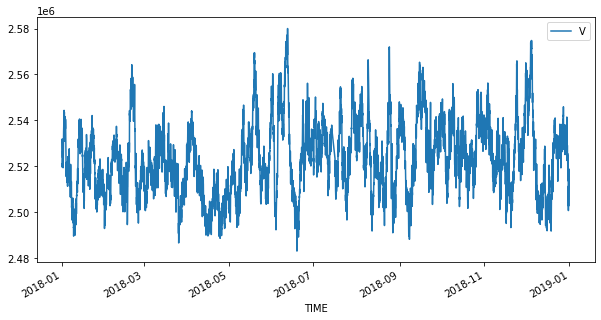

In [8]:
data.query('V>0').plot('TIME','V',figsize=(10,5))

ファイルへ出力する

In [9]:
data.to_csv('sample.csv')

### Correctedデータの場合

In [10]:
data = CREST.load('SaoMartinho',2018,corrected=True)

Read remote data: http://cosray.shinshu-u.ac.jp/crest/DB/Public/Archives/GMDN/Correct/SaoMartinho/Sao2018_1hour_copre+error.txt
Parse to DataFrame
Create datetime data (TIME column)
Finished!


### 全観測所の2018年以降のUncorrectedデータを取得する例

In [12]:
dict_data = dict()

In [13]:
for station in CREST.stations.keys():
    for year in range(2018,2022):
        dict_data[station + str(year)] = CREST.load(station,year)

Read remote data: http://cosray.shinshu-u.ac.jp/crest/DB/Public/Archives/GMDN/Uncorrect/Nagoya/Nagoya2018_1hour_raw+error.txt
Parse to DataFrame
Create datetime data (TIME column)
Finished!
Read remote data: http://cosray.shinshu-u.ac.jp/crest/DB/Public/Archives/GMDN/Uncorrect/Nagoya/Nagoya2019_1hour_raw+error.txt
Parse to DataFrame
Create datetime data (TIME column)
Finished!
Read remote data: http://cosray.shinshu-u.ac.jp/crest/DB/Public/Archives/GMDN/Uncorrect/Nagoya/Nagoya2020_1hour_raw+error.txt
Parse to DataFrame
Create datetime data (TIME column)
Finished!
Read remote data: http://cosray.shinshu-u.ac.jp/crest/DB/Public/Archives/GMDN/Uncorrect/Nagoya/Nagoya2021_1hour_raw+error.txt
Parse to DataFrame
Create datetime data (TIME column)
Finished!
Read remote data: http://cosray.shinshu-u.ac.jp/crest/DB/Public/Archives/GMDN/Uncorrect/Hobart/Hobart2018_1hour_raw+error.txt
Parse to DataFrame
Create datetime data (TIME column)
Finished!
Read remote data: http://cosray.shinshu-u.ac.jp/cr

DataFrameを格納したリストの名前一覧

In [11]:
dict_data.keys()

dict_keys(['Nagoya2018', 'Nagoya2019', 'Nagoya2020', 'Nagoya2021', 'Hobart2018', 'Hobart2019', 'Hobart2020', 'Hobart2021', 'SaoMartinho2018', 'SaoMartinho2019', 'SaoMartinho2020', 'SaoMartinho2021', 'Kuwait2018', 'Kuwait2019', 'Kuwait2020', 'Kuwait2021', 'Syowa2018', 'Syowa2019', 'Syowa2020', 'Syowa2021'])

中身の一つを確認

In [16]:
dict_data['Syowa2019']

,year,month,day,hour,V,Verr,N,Nerr,S,Serr,...,NE,NEerr,SE,SEerr,NW,NWerr,SW,SWerr,Pres.,TIME
0,2019,1,1,0,266455,422,37536,114,37174,113,...,10100,53,10010,52,9961,53,9889,51,980.243,2019-01-01 00:30:00
1,2019,1,1,1,266879,422,37615,114,37246,112,...,10109,53,10048,53,10005,53,9923,52,980.210,2019-01-01 01:30:00
2,2019,1,1,2,266486,422,37554,114,37210,113,...,10169,53,9954,53,9949,52,9931,52,980.077,2019-01-01 02:30:00
3,2019,1,1,3,267151,422,37478,113,37388,113,...,10103,53,9976,52,10022,53,9890,52,979.921,2019-01-01 03:30:00
4,2019,1,1,4,265937,421,37497,114,37406,114,...,10068,53,9925,52,10010,53,9968,53,979.856,2019-01-01 04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019,12,31,19,263205,419,37506,114,37222,113,...,10048,53,9989,53,9879,52,9921,53,982.631,2019-12-31 19:30:00
8756,2019,12,31,20,263191,418,37271,113,37082,113,...,10016,53,9899,52,10014,52,9842,52,982.317,2019-12-31 20:30:00
8757,2019,12,31,21,263256,418,37397,114,37297,113,...,10100,53,9917,52,10014,53,9915,52,982.035,2019-12-31 21:30:00
8758,2019,12,31,22,263205,418,37587,114,37120,113,...,10096,53,9982,53,9972,53,9946,53,981.512,2019-12-31 22:30:00
